In [211]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec
#import matplotlib.pylab as pl

In [190]:
def ex2_jacobiana_inv (h, u, lamb, alpha, beta, gamma):
    J = np.array([[1-h*(lamb - alpha*u[1]), h*alpha*u[0]],
                   [-h*beta*u[1], 1-h*(beta*u[0]-gamma)]], dtype='f')
    
    J_inv = np.linalg.inv(J)
    
    return J_inv

In [191]:
def ex2_f_func (u, lamb, alpha, beta, gamma):
    F = np.array([lamb*u[0]-alpha*u[0]*u[1], beta*u[0]*u[1]-gamma*u[1]], dtype='f')
    
    return F

In [192]:
def ex2_g_func (h, uk, uk1, lamb, alpha, beta, gamma):
    F = np.array([lamb*uk1[0]-alpha*uk1[0]*uk1[1], beta*uk1[0]*uk1[1]-gamma*uk1[1]], dtype='f')
    
    Gk1 = uk1-h*F-uk
    
    return Gk1

In [193]:
def ex2_metodo_newton (n, h, uk1_l0, lamb, alpha, beta, gamma):
    
    uk1_l = uk1_l0
    
    for l in range(n):
        J_inv = ex2_jacobiana_inv(h, uk1_l, lamb, alpha, beta, gamma)
        G = ex2_g_func(h, uk1_l0, uk1_l, lamb, alpha, beta, gamma) # se considerarmos uk1_l0 = uk
        
        uk1_l1 = uk1_l - np.dot(J_inv, G)
        uk1_l = uk1_l1
        
    return uk1_l1

In [194]:
def ex2_euler_exp (T0, Tf, n, u0, lamb, alpha, beta, gamma, linspc):
    arr_euler_exp = np.array([u0], dtype='f')
    
    h = (Tf-T0)/n
    
    uk=u0
    
    divisor = int(n/linspc)
    
    if(divisor < 1):
        print('A quantidade de pontos a serem plotados deve ser menor ou igual ao número de passos')
        exit()
    
    for k in range(n):
        uk1 = uk + h*ex2_f_func(uk, lamb, alpha, beta, gamma)
        uk = uk1
        
        if(k%divisor == 0):
            arr_euler_exp = np.vstack([arr_euler_exp, uk])
            
    return arr_euler_exp

In [195]:
def ex2_euler_imp (T0, Tf, n, n_l, u0, lamb, alpha, beta, gamma, linspc):
    arr_euler_imp = np.array([u0], dtype='f')
    
    h = (Tf-T0)/n
        
    uk = u0
        
    divisor = int(n/linspc)
        
    if(divisor < 1):
        print('A quantidade de pontos a serem plotados deve ser menor ou igual ao número de passos')
        exit()        
        
    for k in range(n):
        uk1 = ex2_metodo_newton(n_l, h, uk, lamb, alpha, beta, gamma)
        uk = uk1
        
        if(k%divisor == 0):
            arr_euler_imp = np.vstack([arr_euler_imp, uk])
        
    return arr_euler_imp

In [196]:
def ex2_erro_euler (T0, Tf, n, n_l, u0, lamb, alpha, beta, gamma):
    
    arr_euler_exp = ex2_euler_exp(T0, Tf, n, u0, lamb, alpha, beta, gamma, n)
    arr_euler_imp = ex2_euler_imp(T0, Tf, n, n_l, u0, lamb, alpha, beta, gamma, n)
    
    arr_erro = arr_euler_imp - arr_euler_exp
    
    return arr_erro

In [197]:
def ex2_runge_kuttan4 (T0, Tf, n, u0, lamb, alpha, beta, gamma, linspc):
    
    C1=1/6
    C2=1/3
    C3=1/3
    C4=1/6
    
    arr_rk4 = np.array([u0], dtype='f')
    
    h = (Tf-T0)/n
    passo = np.array([h, h], dtype='f')
    
    ui=u0
    
    divisor = int(n/linspc)
    
    if(divisor < 1):
        print('A quantidade de pontos a serem plotados deve ser menor ou igual ao número de passos')
        exit()     

    for i in range(n):
        K1=ex2_f_func(ui, lamb, alpha, beta, gamma)
        K2=ex2_f_func(ui+passo*K1/2, lamb, alpha, beta, gamma)
        K3=ex2_f_func(ui+passo*K2/2, lamb, alpha, beta, gamma)
        K4=ex2_f_func(ui+passo*K3, lamb, alpha, beta, gamma)
        
        soma = C1*K1 + C2*K2 + C3*K3 + C4*K4
        
        ui1=ui + passo*soma
        ui=ui1
        
        if(i%divisor == 0):
            arr_rk4 = np.vstack([arr_rk4, ui])
        
    return arr_rk4

# Exercício 2

## Dados:
$\lambda{} = \frac{2}{3}$, $\alpha=\frac{4}{3}$, $\beta{} = 1$, $\gamma{}=1$, $x(0)=1.5$, $y(0)=1.5$ e $[T_0, T_f] = [0, 10]$

# 2.1
Escreva um código para resolver (10)-(11) usando o método de Euler explícito. Você deve plotar um
gráfico do retrato de fase. Faça também uma outro gráfico mostrando simultaneamente o tamanho
de cada população ao longo do tempo (plote as raposas em vermelho e os coelhos em azul). Use
um valor n ≥ 5000.

In [272]:
u0 = np.array([1.5, 1.5], dtype='f')

R_exp = ex2_euler_exp(0, 10, 10000, u0, 2/3, 4/3, 1, 1, 1000)

In [353]:
t = np.arange(0, 10.000000000000001, 10/1000)

### Pop. raposas x Pop. coelhos

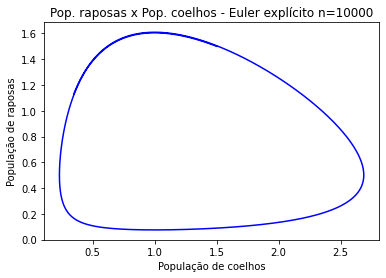

In [274]:
plt.plot(R_exp[:,0], R_exp[:,1], color='blue')
plt.xlabel('População de coelhos')
plt.ylabel('População de raposas')
plt.title('Pop. raposas x Pop. coelhos - Euler explícito n=10000')
plt.show()

### População x Tempo

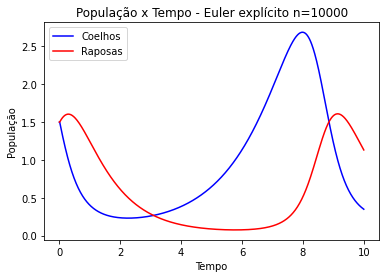

In [275]:
plt.plot(t, R_exp[:,0], color='blue', label='Coelhos')
plt.plot(t, R_exp[:,1], color='red', label='Raposas')
plt.xlabel('Tempo')
plt.ylabel('População')
plt.title('População x Tempo - Euler explícito n=10000')
plt.legend()
plt.show()

# 2.2
Escreva um código para resolver (10)-(11) usando o método de Euler implícito. Você deve plotar
um gráfico do retrato de fase. Façaa também uma outro gráfico mostrando simultaneamente o
tamanho de cada populção ao longo do tempo (plote as raposas em vermelho e os coelhos em
azul). Use um valor n ≥ 500.

In [276]:
u0 = np.array([1.5, 1.5], dtype='f')

R_imp = ex2_euler_imp(0, 10, 5000, 7, u0, 2/3, 4/3, 1, 1, 1000)

### Pop. raposas x Pop. coelhos

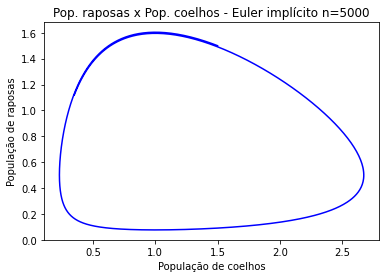

In [277]:
plt.plot(R_imp[:,0], R_imp[:,1], color='blue')
plt.xlabel('População de coelhos')
plt.ylabel('População de raposas')
plt.title('Pop. raposas x Pop. coelhos - Euler implícito n=5000')
plt.show()

### População x Tempo

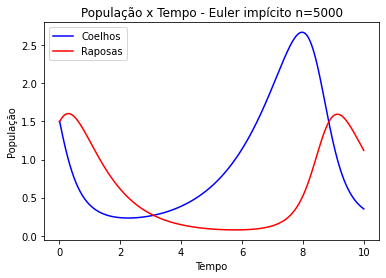

In [278]:
plt.plot(t, R_imp[:,0], color='blue', label='Coelhos')
plt.plot(t, R_imp[:,1], color='red', label='Raposas')
plt.xlabel('Tempo')
plt.ylabel('População')
plt.title('População x Tempo - Euler impícito n=5000')
plt.legend()
plt.show()

# 2.4
Escreva um código para resolver (10)-(11) usando o método de Runge-Kutta 4. Você deve plotar
um gráfico do retrato de fase. Faça também uma outro gráfico mostrando simultaneamente o tamanho de cada população ao longo do tempo (plote as raposas em vermelho e os coelhos em azul). Use um valor n ≥ 500.

In [279]:
u0 = np.array([1.5, 1.5], dtype='f')

R_rk4 = ex2_runge_kuttan4(0, 10, 1000, u0, 2/3, 4/3, 1, 1, 1000)

### Pop. raposas x Pop. coelhos

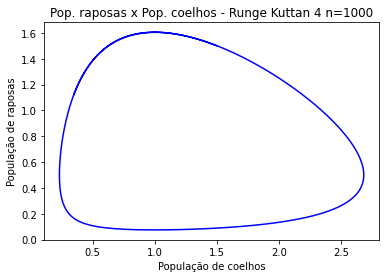

In [280]:
plt.plot(R_rk4[:,0], R_rk4[:,1], color='blue')
plt.xlabel('População de coelhos')
plt.ylabel('População de raposas')
plt.title('Pop. raposas x Pop. coelhos - Runge Kuttan 4 n=1000')
plt.show()

### População x Tempo

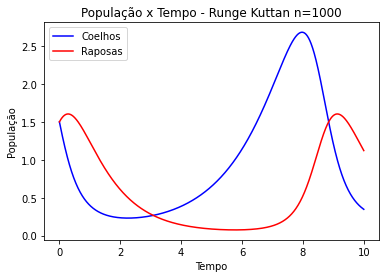

In [281]:
plt.plot(t, R_rk4[:,0], color='blue', label='Coelhos')
plt.plot(t, R_rk4[:,1], color='red', label='Raposas')
plt.xlabel('Tempo')
plt.ylabel('População')
plt.title('População x Tempo - Runge Kuttan n=1000')
plt.legend()
plt.show()

## Plotando 2.1, 2.2 e 2.4

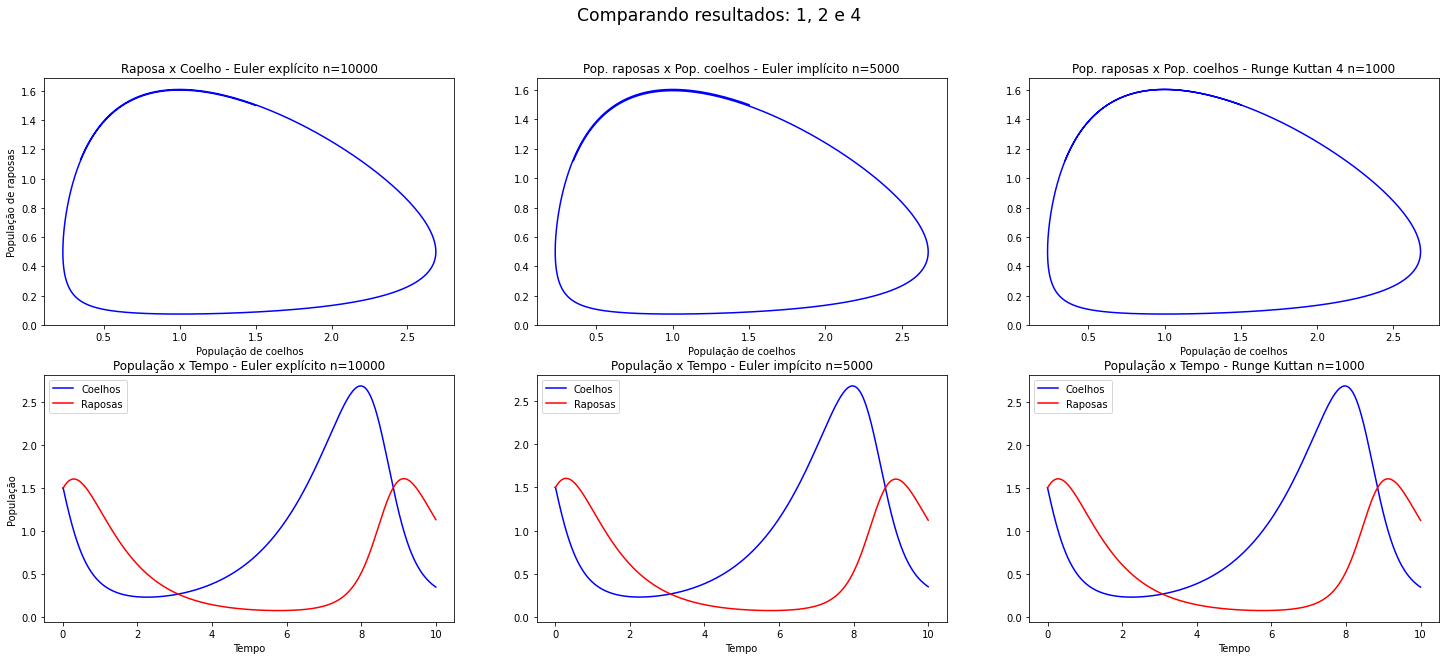

In [355]:
gs = gridspec.GridSpec(2,3)
fig = plt.figure(figsize=(25, 10))
fig.suptitle('Comparando resultados: 1, 2 e 4', size='xx-large')


ax1 = plt.subplot(gs[0, 0])
ax1.set_title('Raposa x Coelho - Euler explícito n=10000')
plt.plot(R_exp[:,0], R_exp[:,1], c='blue')
plt.xlabel('População de coelhos')
plt.ylabel('População de raposas')

ax2 = plt.subplot(gs[0, 1])
ax2.set_title('Pop. raposas x Pop. coelhos - Euler implícito n=5000')
plt.plot(R_imp[:,0], R_imp[:,1], color='blue')
plt.xlabel('População de coelhos')

ax3 = plt.subplot(gs[0, 2])
ax3.set_title('Pop. raposas x Pop. coelhos - Runge Kuttan 4 n=1000')
plt.plot(R_rk4[:,0], R_rk4[:,1], color='blue')
plt.xlabel('População de coelhos')

ax4 = plt.subplot(gs[1, 0])
ax4.set_title('População x Tempo - Euler explícito n=10000')
plt.plot(t, R_exp[:,0], color='blue', label='Coelhos')
plt.plot(t, R_exp[:,1], color='red', label='Raposas')
plt.xlabel('Tempo')
plt.ylabel('População')
plt.legend()

ax5 = plt.subplot(gs[1, 1])
ax5.set_title('População x Tempo - Euler impícito n=5000')
plt.plot(t, R_imp[:,0], color='blue', label='Coelhos')
plt.plot(t, R_imp[:,1], color='red', label='Raposas')
plt.xlabel('Tempo')
plt.legend()

ax6 = plt.subplot(gs[1, 2])
ax6.set_title('População x Tempo - Runge Kuttan n=1000')
plt.plot(t, R_rk4[:,0], color='blue', label='Coelhos')
plt.plot(t, R_rk4[:,1], color='red', label='Raposas')
plt.xlabel('Tempo')
plt.legend()

plt.savefig('teste1', dpi=300)
plt.show()

# 2.3
Sejam $x_{im}(t)$, $y_{im}(t)$ e $x_{ex}(t)$, $y_{ex}(t)$ as soluções usando o método de Euler implícito e explícito,
respectivamente. Vamos definir $E_{x}(t):= x_{im}(t) - x_{ex}(t)$, $E_{y}(t):= y_{im}(t) - y_{ex}(t)$. Para cada valor
n = 250, 500, 1000, 2000, 4000, plote um gráfico com a função $E_{x}(t)$ em azul e a função $E_{y}(t)$ em
vermelho. Comente brevemente o resultado.

In [165]:
u0 = np.array([1.5, 1.5], dtype='f')

## n=250

In [297]:
erro250 = ex2_erro_euler(0, 10, 250, 7, u0, 2/3, 4/3, 1, 1)

In [298]:
t = np.arange(0, 10.0000000001, 10/250)

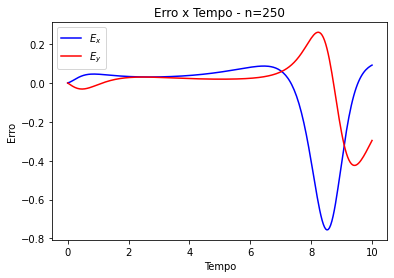

In [299]:
plt.plot(t, erro250[:,0], color='blue', label='$E_{x}$')
plt.plot(t, erro250[:,1], color='red', label='$E_{y}$')
plt.xlabel('Tempo')
plt.ylabel('Erro')
plt.title('Erro x Tempo - n=250')
plt.legend()
plt.show()

## n=500

In [294]:
erro500 = ex2_erro_euler(0, 10, 500, 7, u0, 2/3, 4/3, 1, 1)

In [295]:
t = np.arange(0, 10.0000000001, 10/500)

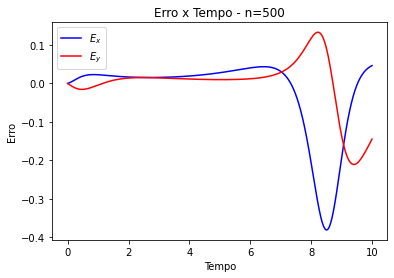

In [296]:
plt.plot(t, erro500[:,0], color='blue', label='$E_{x}$')
plt.plot(t, erro500[:,1], color='red', label='$E_{y}$')
plt.xlabel('Tempo')
plt.ylabel('Erro')
plt.title('Erro x Tempo - n=500')
plt.legend()
plt.show()

## n=1000

In [172]:
erro1000 = ex2_erro_euler(0, 10, 1000, 7, u0, 2/3, 4/3, 1, 1)

In [173]:
t = np.arange(0, 10.0000000001, 10/1000)

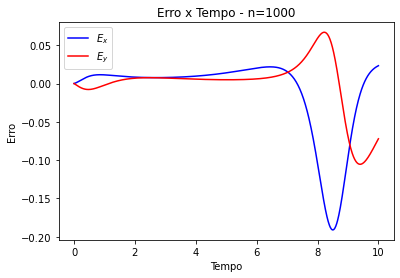

In [285]:
plt.plot(t, erro1000[:,0], color='blue', label='$E_{x}$')
plt.plot(t, erro1000[:,1], color='red', label='$E_{y}$')
plt.xlabel('Tempo')
plt.ylabel('Erro')
plt.title('Erro x Tempo - n=1000')
plt.legend()
plt.show()

## n=2000

In [287]:
erro2000 = ex2_erro_euler(0, 10, 2000, 7, u0, 2/3, 4/3, 1, 1)

In [288]:
t = np.arange(0, 10.0000000001, 10/2000)

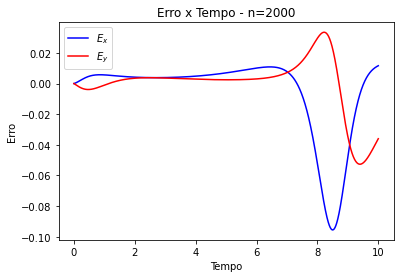

In [289]:
plt.plot(t, erro2000[:,0], color='blue', label='$E_{x}$')
plt.plot(t, erro2000[:,1], color='red', label='$E_{y}$')
plt.xlabel('Tempo')
plt.ylabel('Erro')
plt.title('Erro x Tempo - n=2000')
plt.legend()
plt.show()

## n=4000

In [290]:
erro4000 = ex2_erro_euler(0, 10, 4000, 7, u0, 2/3, 4/3, 1, 1)

In [291]:
t = np.arange(0, 10.0000000001, 10/4000)

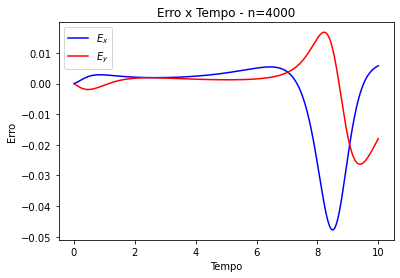

In [292]:
plt.plot(t, erro4000[:,0], color='blue', label='$E_{x}$')
plt.plot(t, erro4000[:,1], color='red', label='$E_{y}$')
plt.xlabel('Tempo')
plt.ylabel('Erro')
plt.title('Erro x Tempo - n=4000')
plt.legend()
plt.show()

## Comparando Erros 

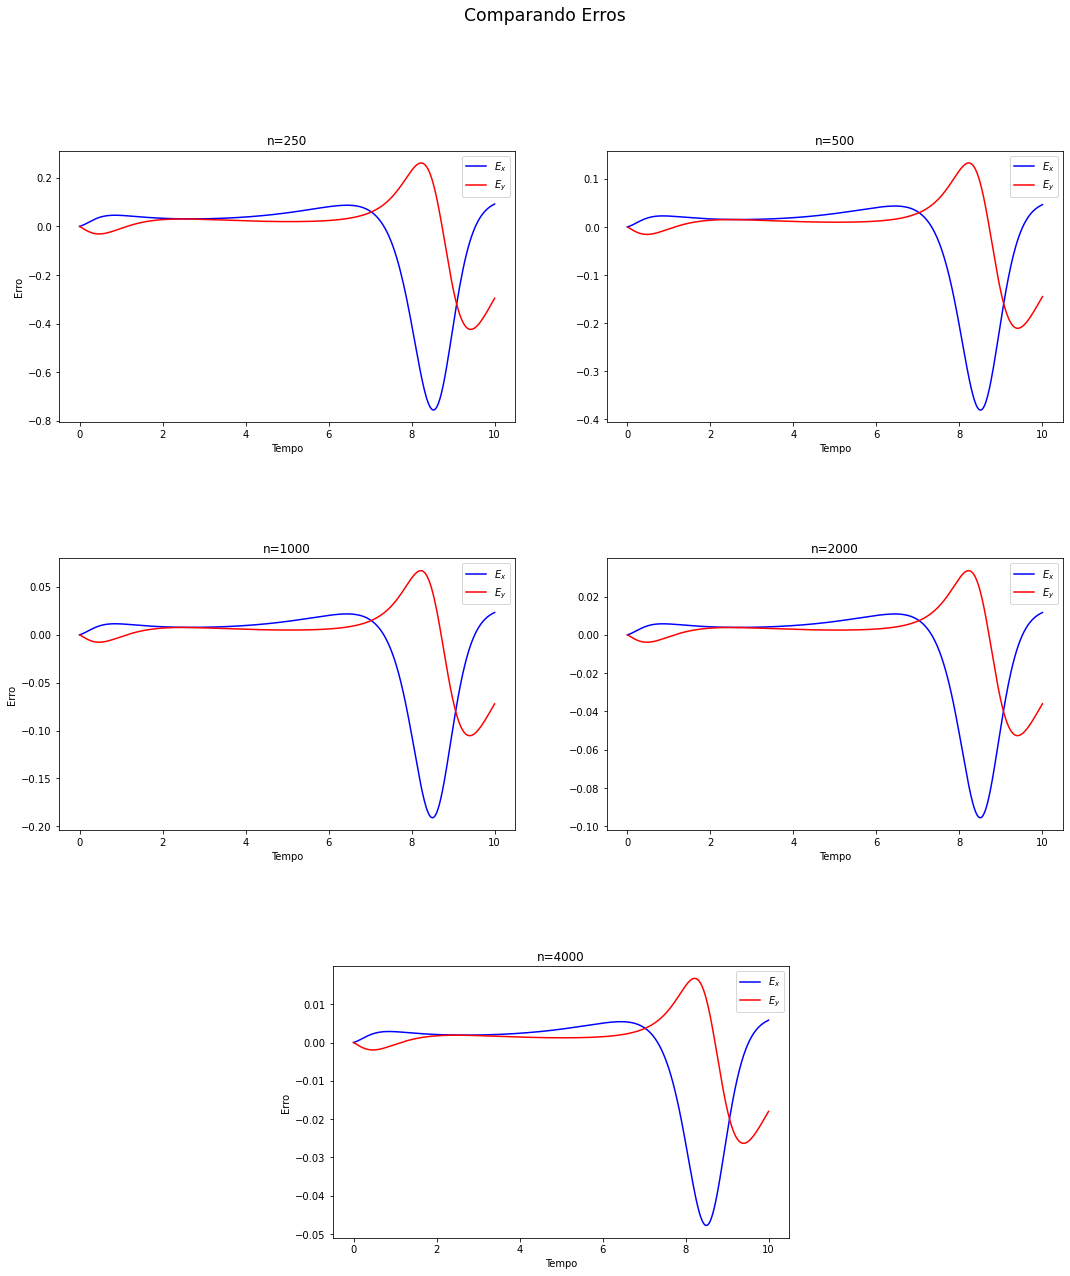

In [356]:
gs = gridspec.GridSpec(3, 4)
gs.update(wspace=.5, hspace=.5)
fig = plt.figure(figsize=(18, 20))
fig.suptitle('Comparando Erros', size='xx-large')

t = np.arange(0, 10.0000000001, 10/250)
ax1 = plt.subplot(gs[0, 0:2])
ax1.set_title('n=250')
plt.plot(t, erro250[:,0], color='blue', label='$E_{x}$')
plt.plot(t, erro250[:,1], color='red', label='$E_{y}$')
plt.xlabel('Tempo')
plt.ylabel('Erro')
plt.legend()

t = np.arange(0, 10.0000000001, 10/500)
ax2 = plt.subplot(gs[0, 2:])
ax2.set_title('n=500')
plt.plot(t, erro500[:,0], color='blue', label='$E_{x}$')
plt.plot(t, erro500[:,1], color='red', label='$E_{y}$')
plt.xlabel('Tempo')
plt.legend()

t = np.arange(0, 10.0000000001, 10/1000)
ax3 = plt.subplot(gs[1, 0:2])
ax3.set_title('n=1000')
plt.plot(t, erro1000[:,0], color='blue', label='$E_{x}$')
plt.plot(t, erro1000[:,1], color='red', label='$E_{y}$')
plt.xlabel('Tempo')
plt.ylabel('Erro')
plt.legend()

t = np.arange(0, 10.0000000001, 10/2000)
ax4 = plt.subplot(gs[1, 2:])
ax4.set_title('n=2000')
plt.plot(t, erro2000[:,0], color='blue', label='$E_{x}$')
plt.plot(t, erro2000[:,1], color='red', label='$E_{y}$')
plt.xlabel('Tempo')
plt.legend()

t = np.arange(0, 10.0000000001, 10/4000)
ax5 = plt.subplot(gs[2, 1:3])
ax5.set_title('n=4000')
plt.plot(t, erro4000[:,0], color='blue', label='$E_{x}$')
plt.plot(t, erro4000[:,1], color='red', label='$E_{y}$')
plt.xlabel('Tempo')
plt.ylabel('Erro')
plt.legend()

plt.savefig('teste2', dpi=300)
plt.show()